# <center>STA 142 A Project - Kaggle Titanic Machine Learning Challenge</center>

### Member1: Yuyan Fan 

### Member2:

### Member3:

# I. Introduction(not done yet)

On April 15, 1912, during Titanic's maiden voyage, it sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this report, we will build a  model that answers the question: “what sorts of people were more likely to survive?”

The dataset is from kaggle titanic competition(https://www.kaggle.com/c/titanic)

In this project, we will be...

# II. Methodology

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
# load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [245]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


* There are 891 entries of data and 12 variables in the train dataset.
* There are 418 entries of data and 11 variables in the test dataset.

### Data dictionary

In [247]:
d = {'Variable': train.columns,"Description" : ["Passenger ID","Survived or not. = No, 1 = Yes", 
                                              "Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd",
                                              "Name","Sex","Age","number of siblings or spouses aboard the Titanic",
                                              "number of parents or children aboard the Titanic",
                                              "Ticket number","Passenger fare","Cabin number",
                                              "Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton."]}
df_dis = pd.DataFrame(data = d)
df_dis

,Variable,Description
0,PassengerId,Passenger ID
1,Survived,"Survived or not. = No, 1 = Yes"
2,Pclass,"Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Name
4,Sex,Sex
5,Age,Age
6,SibSp,number of siblings or spouses aboard the Titanic
7,Parch,number of parents or children aboard the Titanic
8,Ticket,Ticket number
9,Fare,Passenger fare


### Description of numeric data

In [248]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Description of categorical data

In [249]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Shorney, Mr. Charles Joseph",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Missing values

In [250]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [251]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# III. Implementation Details

## 1. Data Preparation

### Drop meaningless variables

In [252]:
train = train.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

In [253]:
test = test.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

* PassengerId, Cabin and Ticket are ID made of random numbers, so we dropped them.
* Name cannot make a difference to survival rate, so we dropped it as well.

### Missing values

In [254]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [255]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

* There are many missing values in 'Age', but we cannot simply drop the missing values, or even the variable,since that would make us lose $\frac{177}{891}$ = 19.9% training data. 
* After doing a little research online on how to handle missing values, we decided to impute missing 'Age' with the mean of age.
* Dropping missing values in other variables would be fine, because there are not many.

In [256]:
train['Age'].fillna(int(train['Age'].mean()), inplace=True)# refill na with variable mean
test['Age'].fillna(int(test['Age'].mean()), inplace=True)

In [257]:
train = train.dropna()# drop na
test = test.dropna()

In [258]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data converting

* Our algorithm cannot deal with catagorical values, so we convert them into numeric ones.
* Sex: 1 = male; 0 = female
* Embarked: 0 = C; 1 = Q; 2 = S

In [259]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder() #make categorical variables into numeric

In [260]:
# sex
def convert_cat(data):
    data['Sex'] = label.fit_transform(data['Sex'])
    data['Embarked'] = label.fit_transform(data['Embarked'])
    return None

In [261]:
convert_cat(train)
convert_cat(test)

In [262]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [263]:
train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: int64

## 2. Exploratory Data Analysis

### Correlation between the variables

In [264]:
corr = train.corr() # shows only numerical variables
corr = corr.replace(1.0, np.nan)
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,NaN,-0.335549,-0.541585,-0.072699,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,NaN,0.127741,-0.331588,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,NaN,0.088257,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.072699,-0.331588,0.088257,NaN,-0.232227,-0.175512,0.090736,-0.025643
SibSp,-0.034040,0.081656,-0.116348,-0.232227,NaN,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.175512,0.414542,NaN,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.090736,0.160887,0.217532,NaN,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.025643,0.068900,0.040449,-0.226311,NaN


<AxesSubplot:>

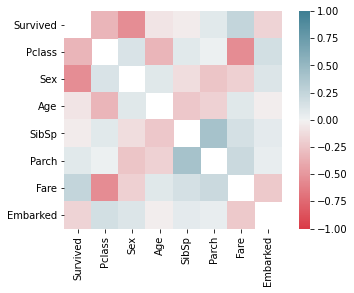

In [265]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

In [266]:
corr.min() # negative correlations

Survived   -0.541585
Pclass     -0.548193
Sex        -0.541585
Age        -0.331588
SibSp      -0.232227
Parch      -0.247508
Fare       -0.548193
Embarked   -0.226311
dtype: float64

In [267]:
print(corr.min().idxmin(), corr[corr.min().idxmin()].idxmin()) # the most negative correlation
corr.min().min()

Pclass Fare


-0.5481932852366449

In [268]:
print(corr.max().idxmax(), corr[corr.max().idxmax()].idxmax()) # the most positive correlation
corr.max().max()

SibSp Parch


0.4145416380997264

* Pclass and Fare are highly correlated with the negative correlation -0.54819.
* SibSp and Parch are highly correlated with the positive correlation 0.4145.

### Analysis on each variable

### Pclass

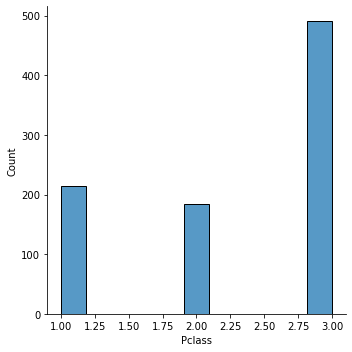

In [269]:
sns.displot(train,x='Pclass') #histogram of Pclass Variable

In [270]:
train.groupby(by="Pclass").mean().iloc[:,0] 

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

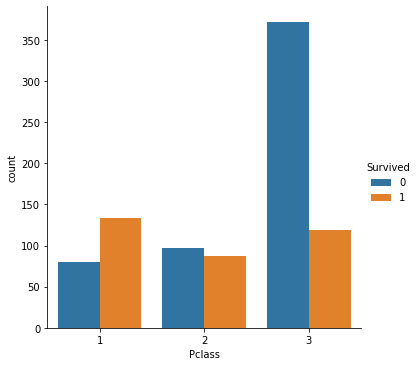

In [271]:
sns.catplot(x='Pclass',hue='Survived',data=train,kind="count") #histogram of Pclass based on Survival

* It seems that around the same amount from each class survived, but more people in the $3^{rd}$ ticket class has the lowest survival rate.

## Sex

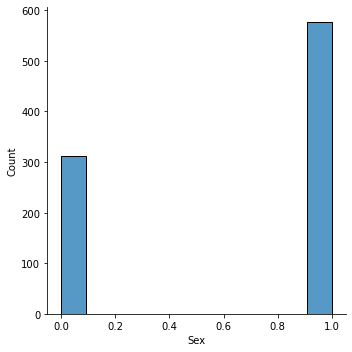

In [272]:
sns.displot(data = train,x='Sex') #histogram of Sex Variable

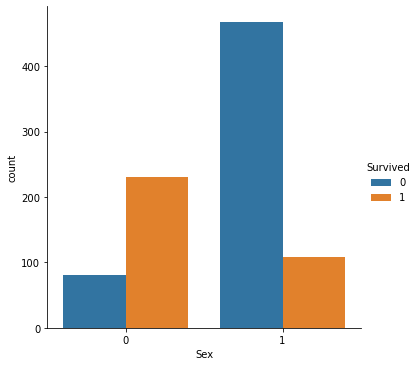

In [273]:
sns.catplot(x='Sex',hue='Survived',data=train,kind="count") #histogram of Sex based on Survival

* Females had a higher proportion of survival.

## Age

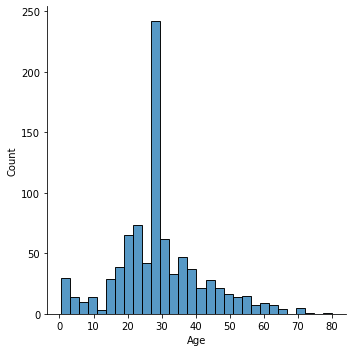

In [274]:
sns.displot(train,x='Age') #histogram of Sex Variable

<AxesSubplot:xlabel='Survived', ylabel='Age'>

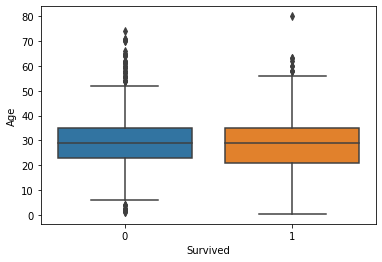

In [275]:
sns.boxplot(x='Survived',y='Age', data = train) #box plot of Age separated by whether they survived or not

* Both of the boxplots look similar to one another. But if we divide age into different age groups, the survival rate of different groups vary and the differences are noticeable.

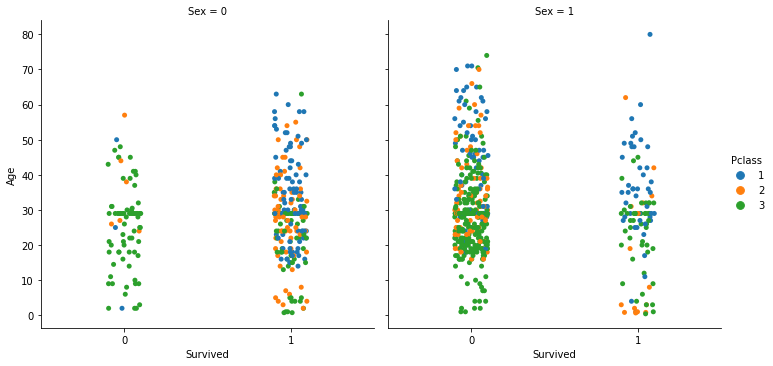

In [276]:
#sns.scatterplot(x='Age', y='Survived', data=new_train,hue='Pclass', style='Sex')
sns.catplot(y='Age',x='Survived',col='Sex',hue='Pclass',data=train)

# not sure how to interpret this plot

In [277]:
# convert age into groups
def conv_age(data):
    res = []
    for i in data:
        if i <= 20:
            res.append(0)
        elif i <= 40:
            res.append(1)
        elif i <= 65:
            res.append(2)
        else:
            res.append(3)
    return res     

In [278]:
test['Age'] = conv_age(test['Age'])

In [279]:
train['Age'] = conv_age(train['Age'])

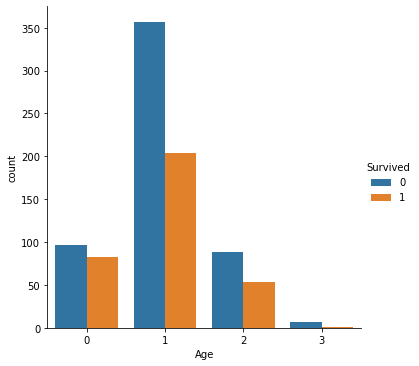

In [280]:
sns.catplot(x='Age',hue='Survived',data=train,kind="count")

In [281]:
train.groupby(by="Age").mean().iloc[:,0] # survival rate for age groups

Age
0    0.458101
1    0.363636
2    0.375887
3    0.125000
Name: Survived, dtype: float64

* Group 3(65+ year old) has the lowest survival rate. Elder people are less likely to survive the harsh environment.
* Group 1(0-20 year old) has the highest survival rate. When emegency happens, people tend to let young people go first.

## Fare

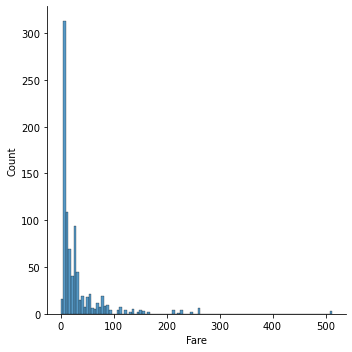

In [282]:
sns.displot(train,x='Fare') #histogram of Fare Variable

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

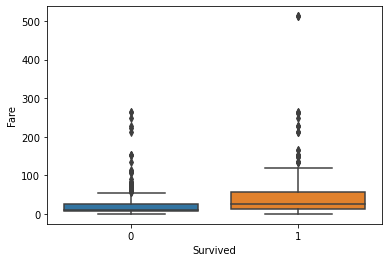

In [283]:
sns.boxplot(x='Survived',y='Fare', data = train) #box plot of Fare separated by whether they survived or not

In [284]:
train.groupby(by="Survived").mean().iloc[:,4] # average fare for survived and not 

Survived
0    0.329690
1    0.467647
Name: Parch, dtype: float64

Survival seems to favor the higher fares.

## Embarked
0 = C; 1 = Q; 2 = S

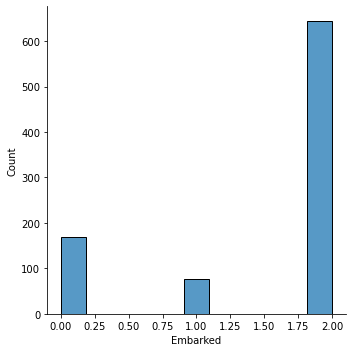

In [285]:
sns.displot(train,x='Embarked')

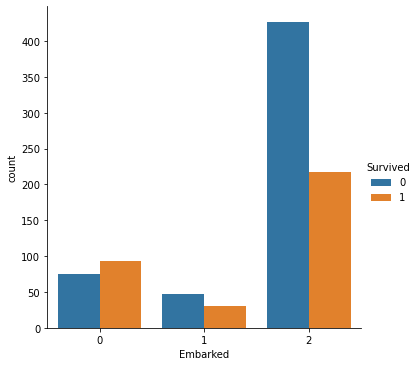

In [286]:
sns.catplot(x='Embarked',hue='Survived',data = train,kind="count") #histogram of Embarked based on Survival

In [287]:
train.groupby(by="Embarked").mean().iloc[:,0] # Embarked and survival rate

Embarked
0    0.553571
1    0.389610
2    0.336957
Name: Survived, dtype: float64

The only significant difference in proportion is when the Port of Embarkation was in Cherbourg, and it has higher survival rate.

## Sibsp and Parch

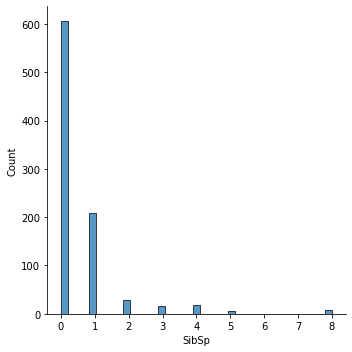

In [288]:
sns.displot(train,x='SibSp')

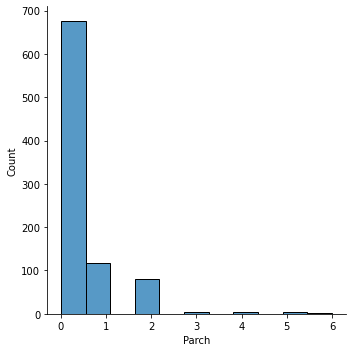

In [289]:
sns.displot(train,x='Parch')

* parch and sibsp are all number of family, so we can sum them up.

In [290]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp']+test['Parch']

In [291]:
test = test.drop(columns=['Parch','SibSp'])
train = train.drop(columns=['Parch','SibSp'])

In [292]:
train.groupby(by="Survived").mean().iloc[:,3] # average family size for survived and not survived passenger

Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64

In [293]:
train.groupby(by="family").mean().iloc[:,0] # family size and survival rate 

family
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

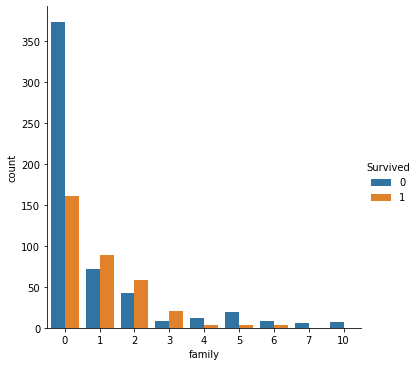

In [294]:
sns.catplot(x='family',hue='Survived',data = train,kind="count") 

* It seems that being alone is related to lower survival rate.
* But larger family size doesn't mean higher survival rate. Having a family of 3 seems to be the best one.

### Interpretation:


## 3. Building models
Instead of using Python package, we will build our own functions. This is the biggest challenge of our project.

In [295]:
x = train.iloc[:,1:7]
y = train.iloc[:,0]
x_test = test

In [296]:
x_test = test
x_test.shape

(417, 6)

In [297]:
x_test

,Pclass,Sex,Age,Fare,Embarked,family
0,3,1,1,7.8292,1,0
1,3,0,2,7.0000,2,1
2,2,1,2,9.6875,1,0
3,3,1,1,8.6625,2,0
4,3,0,1,12.2875,2,2
...,...,...,...,...,...,...
413,3,1,1,8.0500,2,0
414,1,0,1,108.9000,0,0
415,3,1,1,7.2500,2,0
416,3,1,1,8.0500,2,0


### Logstic Regression

In [298]:
# define the functiona
def fit(x, y,learning_rate,iterations): 
    m,n = x.shape
    weight = np.zeros(n)
    b0 = 0
    for i in range(iterations): 
        y_hat = sigmoid(np.dot(x, weight) + b0)
        loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)
        dW = 1/m * np.dot(x.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)
        weight -= learning_rate * dW
        b0 -= learning_rate * db 
    return weight, b0

def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

* learning_rate = 0.02, iteration = 1000

In [299]:
fit(x, y,0.02,1000)

<ipython-input-298-e44bae657476>:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)


(array([-0.11632947, -1.63038494, -0.45022516,  0.29837101, -0.19167158,
        -0.54339937]),
 0.0838030803327668)

In [300]:
parameter = fit(x, y,0.02,1000)
predict = np.dot(x_test, parameter[0]) + parameter[1]

<ipython-input-298-e44bae657476>:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)


* learning_rate = 0.02, iteration = 1000

In [301]:
fit(x, y,0.02,500)

<ipython-input-298-e44bae657476>:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)


(array([-0.29728889, -0.97797396, -0.35747675,  0.2061635 , -0.27721924,
        -0.46041965]),
 -0.057859052121414435)

In [302]:
parameter = fit(x, y,0.02,1000)
predict = np.dot(x_test, parameter) + parameter[1]

<ipython-input-298-e44bae657476>:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_hat)) + (1 - y) * np.log(1-y_hat)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: shapes (417,6) and (2,) not aligned: 6 (dim 1) != 2 (dim 0)

### SVM

In [ ]:
x_svm_train = pd.DataFrame(sc.fit_transform(x))
x_svm_test = pd.DataFrame(sc.transform(x_test))

In [ ]:
# want all variables in the same range so we have to normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(x_svm_train,y)
#predict the response
pred = cls.predict(x_svm_test)

In [ ]:
score = round(svc.score(X_train, Y_train) * 100, 2)
score

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x,y)

In [303]:
y_pred = knn_model.predict(x_test)

### Decision Tree

In [192]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [215]:
# load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [221]:
train['Age'].fillna(int(train['Age'].mean()), inplace=True)# refill na with variable mean
test['Age'].fillna(int(test['Age'].mean()), inplace=True)
train = train.dropna()# drop na
test = test.dropna()

In [222]:
train_df = train.drop(['Ticket', 'Cabin','Name'], axis=1)
test_df = test.drop(['Ticket', 'Cabin','Name'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


In [223]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,C
3,4,1,1,1,35.0,1,0,53.1000,S
6,7,0,1,0,54.0,0,0,51.8625,S
10,11,1,3,1,4.0,1,1,16.7000,S
11,12,1,1,1,58.0,0,0,26.5500,S


In [224]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,1
3,4,1,1,1,35.0,1,0,53.1000,0
6,7,0,1,0,54.0,0,0,51.8625,0
10,11,1,3,1,4.0,1,1,16.7000,0
11,12,1,1,1,58.0,0,0,26.5500,0


In [229]:
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((202, 7), (202,), (91, 7))

In [230]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,1
3,1,1,35.0,1,0,53.1000,0
6,1,0,54.0,0,0,51.8625,0
10,3,1,4.0,1,1,16.7000,0
11,1,1,58.0,0,0,26.5500,0
...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0
872,1,0,33.0,0,0,5.0000,0
879,1,1,56.0,0,1,83.1583,1
887,1,1,19.0,0,0,30.0000,0


In [231]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,23.0,1,0,82.2667,0
14,1,1,47.0,1,0,61.1750,0
24,1,1,48.0,1,3,262.3750,1
26,1,1,22.0,0,1,61.9792,1
28,1,0,41.0,0,0,30.5000,0
...,...,...,...,...,...,...,...
404,1,0,43.0,1,0,27.7208,1
405,2,0,20.0,0,0,13.8625,1
407,1,0,50.0,1,1,211.5000,1
411,1,1,37.0,1,0,90.0000,2


In [232]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


76.24

80.36

In [233]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.504210
6,Fare,0.277277
3,Age,0.198706
5,Parch,0.001086
2,Sex,-0.035477
4,SibSp,-0.265192
0,Survived,-0.487557
7,Embarked,NaN


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.
This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
So is Title as second highest positive correlation.

In [234]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

66.34

83.84
Note that the model generates a confidence score which is higher than Logistics Regression model.

In [235]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.2

84.74
KNN confidence score is better than Logistics Regression but worse than SVM.

In [304]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.5

86.76
The model confidence score is the highest among models evaluated so far.